In [108]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [109]:
df = pd.read_csv("very_clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)

     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1297       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1298       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1299       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1300           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1301         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

      Screen Size                           GPU Operating Syste

In [110]:
x = df['RAM']
x

0        8
1        8
2        8
3       16
4        8
        ..
1297     4
1298    16
1299     2
1300     6
1301     4
Name: RAM, Length: 1302, dtype: int64

In [111]:
y = df['Price (Euros)']
y

0       1339
1        898
2        575
3       2537
4       1803
        ... 
1297     638
1298    1499
1299     229
1300     764
1301     369
Name: Price (Euros), Length: 1302, dtype: int64

In [112]:
colors = ['teal', 'yellowgreen', 'gold']
X = x.values[:, np.newaxis]
x_plot = np.arange(x.max())
x_plot

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)

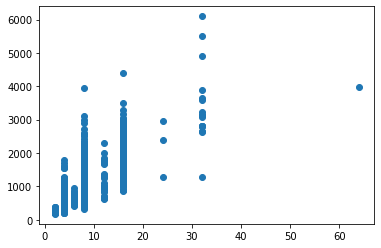

In [113]:
plt.scatter(X, y)
plt.show()

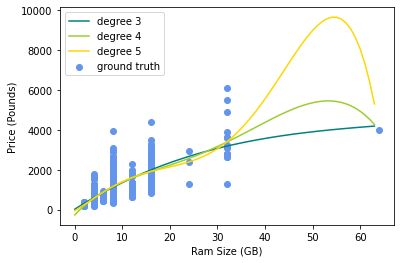

In [114]:
plt.scatter(X, y, color='cornflowerblue', label="ground truth")
for count, degree in enumerate([3,4,5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X,y)
    y_plot = model.predict(x_plot.reshape(-1, 1))
    plt.plot(x_plot, y_plot, color=colors[count], label="degree %d" % degree)
plt.legend(loc='upper left')
plt.xlabel("Ram Size (GB)")
plt.ylabel("Price (Pounds)")
plt.show()

In [115]:
# THIS SEEMS TO BE WORKING FINE
from sklearn import linear_model
x = df[['RAM', 'fullRes', 'Clockspeed']].values
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(x)
# predict_ = poly.fit_transform([16, 2073600, 3.0])
clf = linear_model.LinearRegression()
clf.fit(X_, y)

LinearRegression()

In [116]:
pred = np.array([16, 2073600, 3.0])
pred_ = poly.fit_transform(pred.reshape(1, -1))
clf.predict(pred_)

array([2051.6966236])